# DIF Salarial - Regressão logistica

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import scipy.stats as stats


In [3]:
df = pd.read_excel("Gap_salarial_20231026.xlsx")

In [6]:
df = df[df['Vinculo']=="CLT"]


In [ ]:
df.drop (['Area_N2','Faixa','clas_ivel','Nível','Raça','Empresa','Vinculo','tempo_casa_agrupado'],axis=1,inplace=True)

In [8]:
df.dtypes

Nome Funcionário/Vaga     object
Cargo                     object
Nível 2                    int64
temp. Casa                 int64
Total_Cash               float64
Salário | Vaga           float64
Gênero                    object
Clas_Raca                 object
Area_N1                   object
idade                      int64
educacao                   int64
dtype: object

In [9]:
df["Gênero"] = df["Gênero"].apply(lambda x: 0 if x == "Feminino" else 1)

/tmp/ipykernel_187/1119539204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gênero"] = df["Gênero"].apply(lambda x: 0 if x == "Feminino" else 1)


In [10]:
df = df.rename(columns={"Salário | Vaga": "salario"})

In [11]:
df.dtypes

Nome Funcionário/Vaga     object
Cargo                     object
Nível 2                    int64
temp. Casa                 int64
Total_Cash               float64
salario                  float64
Gênero                     int64
Clas_Raca                 object
Area_N1                   object
idade                      int64
educacao                   int64
dtype: object

In [12]:
X = df[["Gênero", "temp. Casa", "Nível 2","educacao"]]
y = df["salario"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
r2 = reg.score(X_test, y_test)
print(f"R²: {r2:.2f}")

R²: 0.71


In [16]:

X = df[["Gênero", "temp. Casa", "Nível 2", "educacao"]]
X = sm.add_constant(X)  # adiciona uma coluna constante para o intercepto
y = df["salario"]
modelo = sm.OLS(y, X).fit()

In [17]:
genero_dummies = pd.get_dummies(df["Gênero"], prefix="Gênero")
X = pd.concat([X, genero_dummies], axis=1)

In [18]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     980.6
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:13:59   Log-Likelihood:                -15364.
No. Observations:                1541   AIC:                         3.074e+04
Df Residuals:                    1537   BIC:                         3.076e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gênero       985.7706    277.539      3.552      0.0

In [19]:
import matplotlib.pyplot as plt

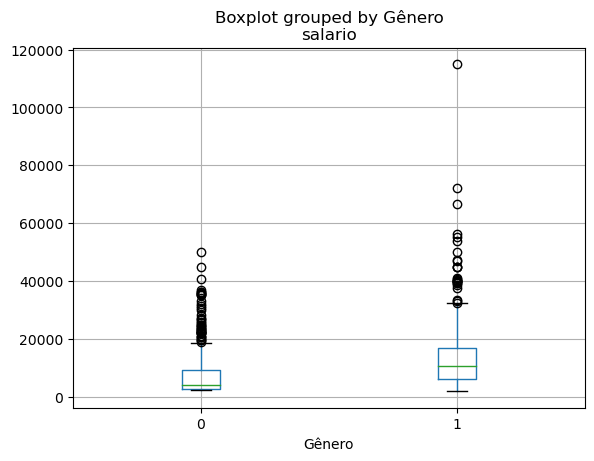

In [20]:

df.boxplot(column="salario", by="Gênero")
plt.show()

In [22]:
dados = pd.read_excel("Gap_salarial_20231026.xlsx")
dados = dados[dados['Vinculo']=="CLT"]


In [23]:
import matplotlib.pyplot as plt

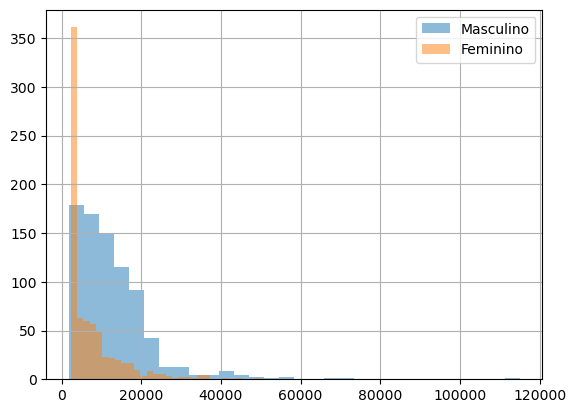

In [24]:

dados[dados["Gênero"] == "Masculino"]["Salário | Vaga"].hist(alpha=0.5, bins=30, label="Masculino")
dados[dados["Gênero"] == "Feminino"]["Salário | Vaga"].hist(alpha=0.5, bins=30, label="Feminino")
plt.legend()
plt.show()

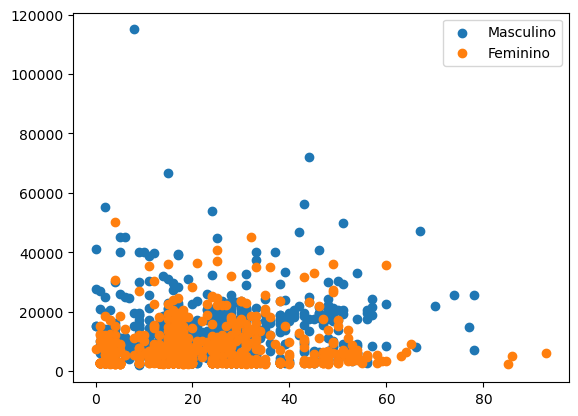

In [25]:
plt.scatter(dados[dados["Gênero"] == "Masculino"]["temp. Casa"], dados[dados["Gênero"] == "Masculino"]["Salário | Vaga"], label="Masculino")
plt.scatter(dados[dados["Gênero"] == "Feminino"]["temp. Casa"], dados[dados["Gênero"] == "Feminino"]["Salário | Vaga"], label="Feminino")
plt.legend()
plt.show()

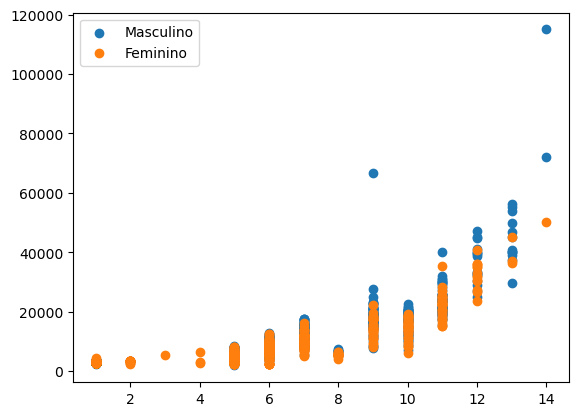

In [26]:
plt.scatter(dados[dados["Gênero"] == "Masculino"]["Nível 2"], dados[dados["Gênero"] == "Masculino"]["Salário | Vaga"], label="Masculino")
plt.scatter(dados[dados["Gênero"] == "Feminino"]["Nível 2"], dados[dados["Gênero"] == "Feminino"]["Salário | Vaga"], label="Feminino")
plt.legend()
plt.show()

In [ ]:
plt.scatter(dados[dados["Gênero"] == "Masculino"]["educacao"], dados[dados["Gênero"] == "Masculino"]["Salário | Vaga"], label="Masculino")
plt.scatter(dados[dados["Gênero"] == "Feminino"]["educacao"], dados[dados["Gênero"] == "Feminino"]["Salário | Vaga"], label="Feminino")
plt.legend()
plt.show()

In [34]:
# TESTE T

In [64]:
dados = pd.read_excel("Gap_salarial_20231026.xlsx")
dados = dados[dados['Vinculo']=="CLT"]
dados = dados[dados['Nível 2']==1]

In [ ]:


salarios_homens = dados[dados["Gênero"] == "Masculino"]["Salário | Vaga"]
salarios_mulheres = dados[dados["Gênero"] == "Feminino"]["Salário | Vaga"]

media_homens = salarios_homens.mean()
media_mulheres = salarios_mulheres.mean()

from scipy.stats import ttest_ind
t, p = ttest_ind(salarios_homens, salarios_mulheres, equal_var=False)
if p < 0.05:
    print("Há diferença significativa entre as médias salariais dos grupos de homens e mulheres.")
    print(p)
else:
    print("Não há diferença significativa entre as médias salariais dos grupos de homens e mulheres.")
    print(p)

In [68]:
# Mann-Whitney U

In [17]:
dados = pd.read_excel("Gap_salarial_20231026.xlsx")
dados = dados[dados['Vinculo']=="CLT"]
dados = dados[dados['Nível 2']==13]

In [18]:

# Importe os dados
salarios_homens = dados[dados["Gênero"] == "Masculino"]["Salário | Vaga"]
salarios_mulheres = dados[dados["Gênero"] == "Feminino"]["Salário | Vaga"]

# Crie as amostras
amostra_homens = np.array(salarios_homens)
amostra_mulheres = np.array(salarios_mulheres)

# Calcule o teste Mann-Whitney U
valor_u = stats.mannwhitneyu(amostra_homens, amostra_mulheres)


# Imprima os resultados
print("Valor U:", valor_u)
print("p-valor:", valor_u.pvalue)

# Adicione um código para mostrar se a diferença é significativa
if valor_u.pvalue < 0.05:
    print("A diferença é significativa")
else:
    print("A diferença não é significativa")


Valor U: MannwhitneyuResult(statistic=29.5, pvalue=0.2005585035505426)
p-valor: 0.2005585035505426
A diferença não é significativa
